In [25]:
import psycopg2
from psycopg2 import Error
from sqlalchemy import create_engine
from sqlalchemy import inspect
from SQLkeys import password
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    # Connect to an existing database
    protocol = 'postgresql'
    username = 'postgres'
    host = 'localhost'
    port = 5432
    database_name = 'EmployeesSQL'

    # Create a cursor to perform database operations
    connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
    con = psycopg2.connect(connection_string)

    def pd_df(sql_query, database = con):
        table = pd.read_sql_query(sql_query, database)
        return table
    salaries=pd_df('SELECT * from salaries')
    employee=pd_df('select * from employees')
    title=pd_df('select * from titles')
    

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)

finally:
     if (con):
        con.close()
        print("PostgreSQL connection is closed")


PostgreSQL connection is closed


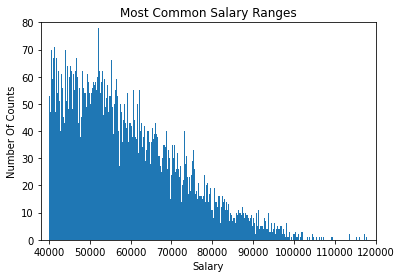

<Figure size 432x288 with 0 Axes>

In [32]:
plt.hist(salaries['salary'],bins=10000)
plt.title("Most Common Salary Ranges")
plt.xlabel("Salary")
plt.ylabel('Number Of Counts')
plt.xlim(38000,120000)
plt.ylim(0,80)
plt.show()
plt.savefig('OutputData/ADA1',dpi=400);


In [27]:
employee.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [28]:
#rename column to merge table

employee=employee.rename(columns={'emp_title_id':'title_id'})

#merge Table(employee) and Table(title)

merge1=employee.merge(title,how='left',on='title_id')

#merge Table(salaries) with above merged Table

FinalTable=merge1.merge(salaries,how='left',on='emp_no')


In [29]:
Group_df=FinalTable.groupby(FinalTable['title'])['salary'].mean()

Group_df

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

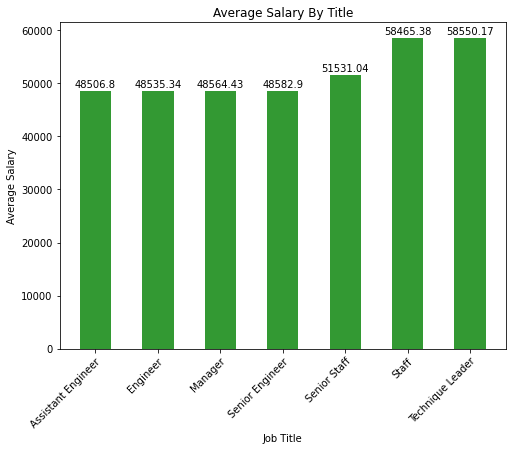

In [30]:
x_ticks=Group_df.index.values
x_axis=np.arange(len(x_ticks))
plt.figure(figsize=(8,6))
plt.bar(x_axis,Group_df.sort_values(ascending=True),
        facecolor='green',alpha=0.8,align='center',width=0.5)

for x,y in enumerate(Group_df.sort_values(ascending=True)):
    plt.text(x,y+700,str(round(y,2)),ha='center')


tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,x_ticks,rotation_mode='anchor',ha='right',rotation=45)
plt.title('Average Salary By Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.savefig('OutputData/ADA2',dpi=400)
plt.show();

